<a href="https://colab.research.google.com/github/abequette/CS167Fall22Code/blob/main/Day07_Notes_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example code from CS 167 on September 20, 2022


# Graphs! 
Let's take a look at how to plot data in a iPython Notebook:

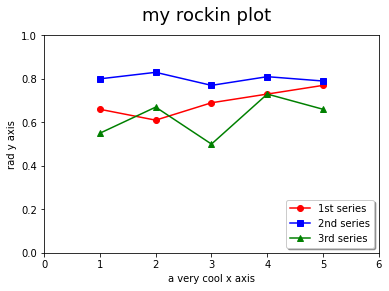

In [1]:
import matplotlib.pyplot as plt

#lets start by making up some data
xvals = [1,2,3,4,5]
series1 = [.66,.61,.69,.73,.77]
series2 = [.8,.83,.77,.81,.79]
series3 = [.55,.67,.5,.73,.66]

#add names for the graph and axes
plt.suptitle('my rockin plot',fontsize=18)
plt.xlabel('a very cool x axis')
plt.ylabel('rad y axis')

#and plot our series
plt.plot(xvals,series1,'ro-',label='1st series')
plt.plot(xvals,series2,'bs-',label='2nd series')
plt.plot(xvals,series3,'g^-',label='3rd series')

# add a key and set the values for your axis (plt.axis[x_min, x_max, y_min, y_max])
plt.legend(loc='lower right', shadow=True)
plt.axis([0, 6, 0, 1]) ## 0 to 6 in x-dimension; 0 to 1 in y-dimension
plt.show()

In [2]:
#Now, let's plot something about our data.
import pandas
import numpy
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:

#load in the data
spotify_data = pandas.read_csv('/content/drive/MyDrive/CS167/spotify_top_charts.csv') #change this line to point to your data

#work with a subset of the data
subset = spotify_data[['artist_names','track_name','peak_rank']]
spotify_subset = subset.dropna(subset=['peak_rank'])
spotify_subset.head()


,artist_names,track_name,peak_rank
0,Glass Animals,Heat Waves,1.0
1,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1.0
2,Anitta,Envolver,3.0
3,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3.0
4,GAYLE,abcdefu,1.0


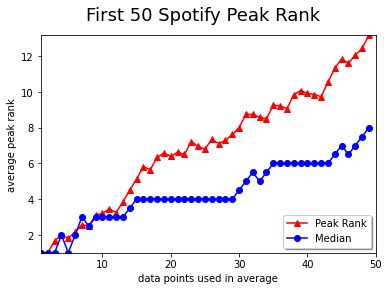

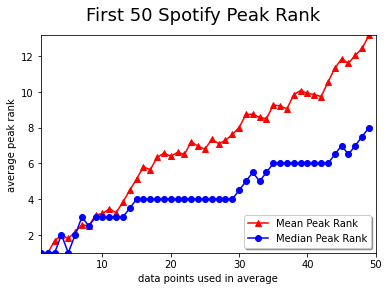

In [16]:
import matplotlib.pyplot as plt

# a silly function that returns the average peak_rank for the first k tracks in the dataframe
def getAveragePeakRank(data,k):
    return data["peak_rank"].iloc[0:k].mean()
def getMedianPeakRank(data,k):
    return data["peak_rank"].iloc[0:k].median()
number_of_points = 50

# populate the list
ranks_list = []
for i in range(1,number_of_points):
    val = getAveragePeakRank(spotify_subset,i)
    ranks_list.append(val)
ranks_med = []
for i in range(1,number_of_points):
    val = getMedianPeakRank(spotify_subset,i)
    ranks_med.append(val)

# plot it!
xvals = range(1,number_of_points)
plt.suptitle('First 50 Spotify Peak Rank',fontsize=18)
plt.xlabel('data points used in average')
plt.ylabel('average peak rank')
plt.plot(xvals,ranks_list,'r^-',label='Mean Peak Rank')
plt.plot(xvals,ranks_med,'bo-',label='Median Peak Rank')
plt.legend(loc='lower right', shadow=True)
ymin = min(ranks_list)
ymax = max(ranks_list)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()

# Exercise #1
To do:
- Change the number of points to 50
- Change the range
- Change the titles
- Also plot the median (blue circles)



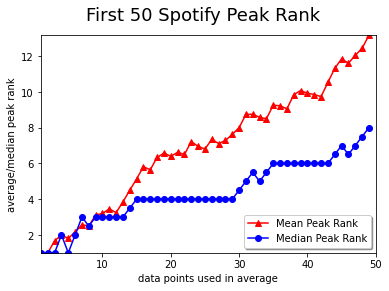

In [18]:
# exercise #1 code goes here:

import matplotlib.pyplot as plt

# a silly function that returns the average peak_rank for the first k tracks in the dataframe
def getAveragePeakRank(data,k):
    return data["peak_rank"].iloc[0:k].mean()
def getMedianPeakRank(data,k):
    return data["peak_rank"].iloc[0:k].median()
number_of_points = 50

# populate the list
ranks_list = []
for i in range(1,number_of_points):
    val = getAveragePeakRank(spotify_subset,i)
    ranks_list.append(val)
ranks_med = []
for i in range(1,number_of_points):
    val = getMedianPeakRank(spotify_subset,i)
    ranks_med.append(val)

# plot it!
xvals = range(1,number_of_points)
plt.suptitle('First 50 Spotify Peak Rank',fontsize=18)
plt.xlabel('data points used in average')
plt.ylabel('average/median peak rank')
plt.plot(xvals,ranks_list,'r^-',label='Mean Peak Rank')
plt.plot(xvals,ranks_med,'bo-',label='Median Peak Rank')
plt.legend(loc='lower right', shadow=True)
ymin = min(ranks_list)
ymax = max(ranks_list)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()


# Metrics and Testing
Let's use the iris dataset and see how accurate our kNN model is.

In [20]:
data = pandas.read_csv('/content/drive/MyDrive/CS167/irisData.csv') #change this line to point to your data
#shuffle the data - "sampling" the full set in random order
shuffled_data = data.sample(frac=1, random_state=41)
#use the first 20 rows in the shuffled set as testing data #train with the rest
test_data = shuffled_data.iloc[0:20]
train_data = shuffled_data.iloc[20:]

In [21]:
# take a look at the testing_data
print("testing data shape:", test_data.shape)
test_data.head()

testing data shape: (20, 5)


,sepal length,sepal width,petal length,petal width,species
119,6.0,2.2,5.0,1.5,Iris-virginica
128,6.4,2.8,5.6,2.1,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor
112,6.8,3.0,5.5,2.1,Iris-virginica


In [22]:
# take a look at the training_data
print("training data shape:", train_data.shape)
train_data.head()

training data shape: (130, 5)


,sepal length,sepal width,petal length,petal width,species
81,5.5,2.4,3.7,1.0,Iris-versicolor
120,6.9,3.2,5.7,2.3,Iris-virginica
43,5.0,3.5,1.6,0.6,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor


In [23]:
def classify_kNN(new_example,train_data,k):
    # outputs the most commonly-occuring (mode) species of the closeset k training examples 
    # designed to work on the iris data set
    train_data_copy = train_data.copy() #use a copy of the training set just so we don't mess up the original
    train_data_copy['distance_to_new'] = numpy.sqrt(
        (new_example['petal length']-train_data_copy['petal length'])**2
        +(new_example['sepal length']-train_data_copy['sepal length'])**2
        +(new_example['petal width']-train_data_copy['petal width'])**2
        +(new_example['sepal width']-train_data_copy['sepal width'])**2)
    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    #mode() will return most common thing in the closest k examples in the sorted dataframe; iloc will get the actual string of the species
    prediction = sorted_data.iloc[0:k]['species'].mode().iloc[0] 
    return prediction

In [24]:
def accuracy(actual,predicted):
    # INPUT: 
    #   actual: a list of values
    #   predicted: a list of value
    #   (we assume that number of elements in actual and predicted match)
    # OUTPUT: 
    #   the percentage in which predicted & actual values match
    num_correct = 0
    for i in range(len(actual)):
      if actual.iloc[i] == predicted.iloc[i]:
        num_correct +=1
    frac_correct = num_correct/len(actual)
    return frac_correct

In [27]:
def classify_all_kNN(test_data, train_data, k):
  results = []
  for i in range(len(test_data)):
    prediction = classify_kNN(test_data.iloc[i], train_data, k)
    results.append(prediction)
  return pandas.Series(results)
    # INPUT:
    #   test_data: a dataframe of the testing data set
    #   train_data: a dataframe of the training data set
    #   k: an integer
    # OUTPUT:
    #   a pandas.Series of the predicted results
    # for each item in the test_data list, apply the classify_kNN function (also passing the train_data and k)
    # return a pandas.Series of the predicted results
   # print("Exercise #2 --- YOUR CODE HERE")


In [28]:
# get a list of predictions using 5-NN
predictions5NN = classify_all_kNN(test_data,train_data,5)

# print out the ACTUAL vs. PREDICTIONS for our testing data
print('ACTUAL\t\tPREDICTIONS')
for i in range(len(test_data)):
    print(test_data['species'].iloc[i], "---", predictions5NN.iloc[i] )

# print out the accuracy...
acc = accuracy(test_data['species'],predictions5NN)
print("accuracy:", acc)

ACTUAL		PREDICTIONS
Iris-virginica --- Iris-virginica
Iris-virginica --- Iris-virginica
Iris-virginica --- Iris-virginica
Iris-versicolor --- Iris-versicolor
Iris-virginica --- Iris-virginica
Iris-versicolor --- Iris-versicolor
Iris-virginica --- Iris-virginica
Iris-versicolor --- Iris-versicolor
Iris-virginica --- Iris-virginica
Iris-virginica --- Iris-virginica
Iris-virginica --- Iris-virginica
Iris-setosa --- Iris-setosa
Iris-setosa --- Iris-setosa
Iris-versicolor --- Iris-versicolor
Iris-setosa --- Iris-setosa
Iris-virginica --- Iris-versicolor
Iris-setosa --- Iris-setosa
Iris-versicolor --- Iris-virginica
Iris-setosa --- Iris-setosa
Iris-setosa --- Iris-setosa
accuracy: 0.9


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#reload the data
data = pandas.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/irisData.csv')

shuffled_data = data.sample(frac=1, random_state = 41)

# create test and training data sets
test_data = shuffled_data.iloc[0:20]
train_data = shuffled_data.iloc[20:]

# explore different values of k
k_vals = [1,3,5]
kNN_accuracies = []

for k in k_vals:
    predictions = classify_all_kNN(test_data,train_data,k)
    current_accuracy = accuracy(test_data['species'],predictions)
    kNN_accuracies.append(current_accuracy)


plt.suptitle('Iris Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,10,0,1])

plt.show()

# exercise #3:
To Do:
- add more points: add multiple values of k to the graph 
- explain the phenomenon that you observe